In [28]:
#so here i am trying to train a model to recognoze digits which are images which have digits from a ranage of numbers.
#so dey with me as we determine if our model can predict this correctly

#step1 Import libraries


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [29]:
#Step2

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape) #printing the shape of the image which is an 8by8

Image Data Shape (1797, 64)
Label Data Shape (1797,)


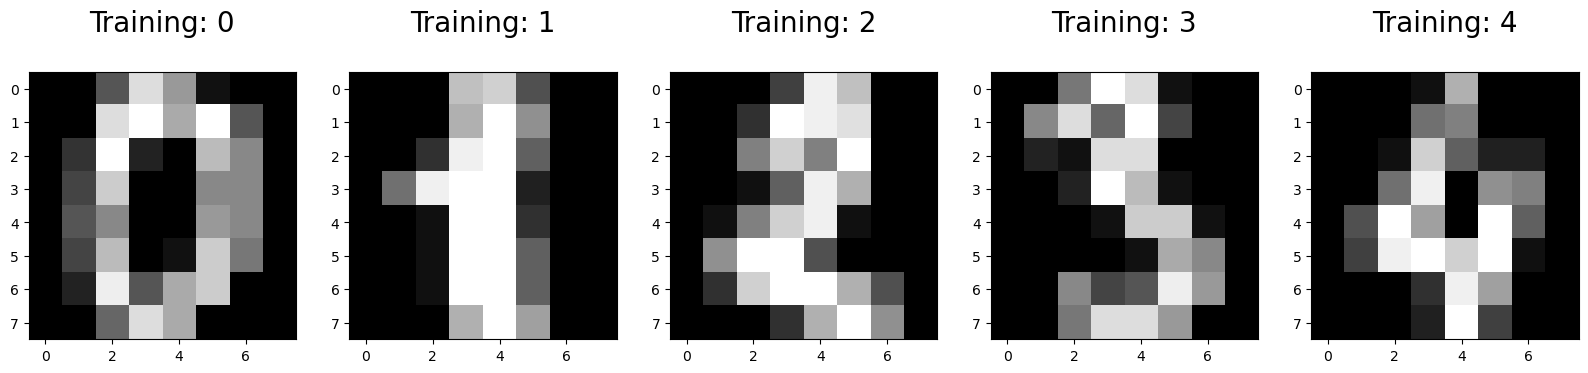

In [6]:
#Step3 Import libraries

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)
plt.show()   

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [30]:
print(x_train.shape)

(1383, 64)


In [31]:
print(x_test.shape)

(414, 64)


In [32]:
print(y_train.shape)

(1383,)


In [33]:
print(y_test.shape)

(414,)


In [34]:
from sklearn.linear_model import LogisticRegression


In [35]:
from sklearn.linear_model import LogisticRegression
#create an instace of logisitc regression.
logisticRegr = LogisticRegression(max_iter=1000) # optional: increase max_iter for convergence logisticRegr.fit(x_train, y_train) #train the model

In [36]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
print(logisticRegr.predict(x_test[2].reshape(1,-1)))

[9]


In [39]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [61]:
y_pred = logisticRegr.predict(x_test)

In [65]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9492753623188406


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [62]:
#time to plot the confusion Matrix. 

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


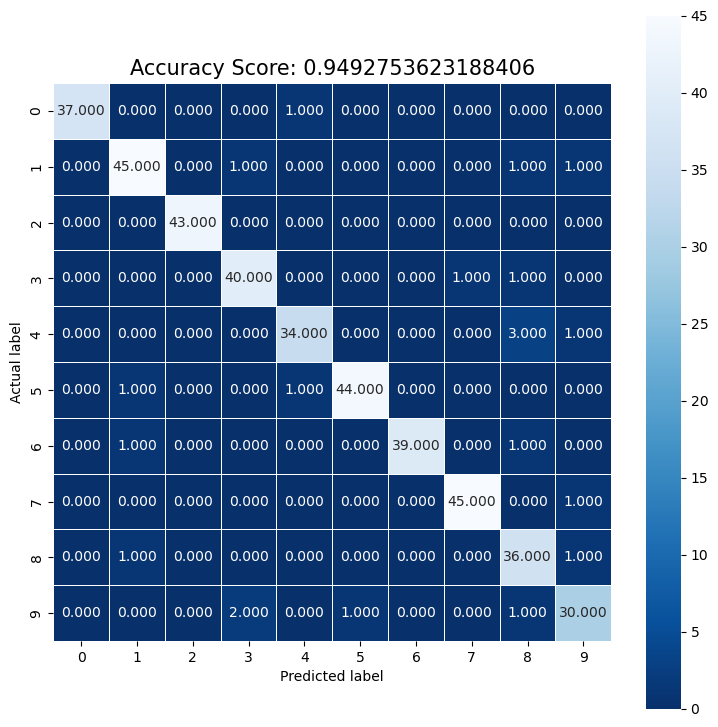

In [63]:
#Now lets turn it to a heat map
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()



In [52]:
#Another way to get the accuracy score 
accuracy = cm.trace() / cm.sum()
print("Accuracy:", accuracy)
print('Trace:',cm.trace())
print('Sum:',cm.sum())

Accuracy: 0.9492753623188406
Trace: 393
Sum: 414


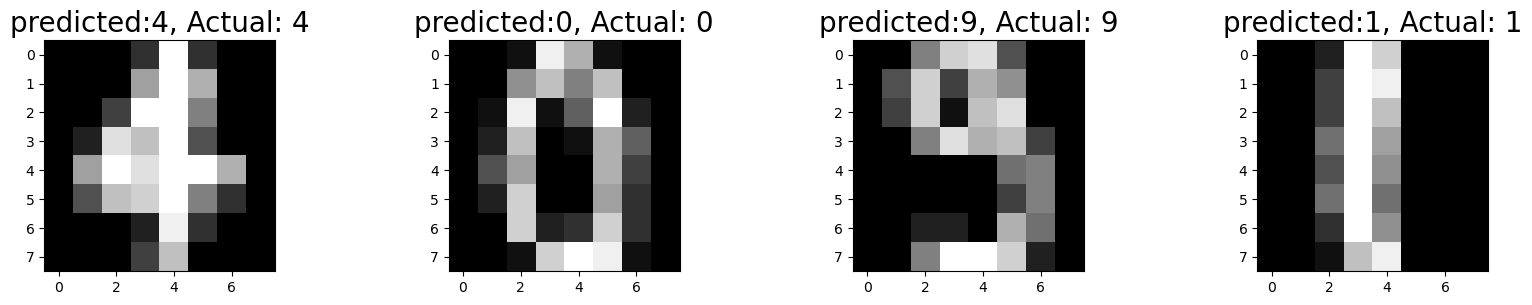

In [67]:
index = 0
ClassifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict == actual:
        ClassifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(ClassifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title('predicted:{}, Actual: {}' .format(predictions[wrong], y_test[wrong]), fontsize=20)
plt.show()